# Car price prediction project
### César Muro Cabral

### Business understanding

In this project, we construct models that predicts the car price (given a cars dataset, dah) including some features as transmission, engine cylinder, highway MPG, and others, to predict its price. This dataset was obtained from Kaggle.  
  
The characteristics of cars are the *features*, and the price is the *target variable*.

Our prediction models will consist in linear regression models with Lasso and Ridge regularizations using sklearn. We also need to employ some preprocessing modules of sklearn to standardize, impute, and encode the categorical data. 

First, we load the following modules

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data understanding
  
We import the data from my github and store it in a dataframe

In [163]:
url="https://raw.githubusercontent.com/cmuro27/Data_Analysis_Projects_and_Notes/main/datasets/car_sales.csv"
df=pd.read_csv(url)
print(df.head())

  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

### Data preparation and Modellation

Now, we perform an exploratory data analysis to learn  
* The distribution of the target variable  
* The features in this dataset  
* The distribution of values in these features  
* The quality of data  
* The number of missing values

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

We can already see that there are some inconsistencies in this dataset: the column names sometimes have spaces, and
sometimes have underscores (_). The same is true for feature values: sometimes they’re capitalized, and sometimes they are short strings with spaces. This is inconvenient and confusing, but we can solve this by normalizing them — replacing all spaces with underscores and lowercase all  letters:

In [164]:
df.columns=df.columns.str.lower().str.replace(" ","_")
string_columns=list(df.dtypes[df.dtypes=='object'].index)
for col in string_columns:
    df[col]=df[col].str.lower().str.replace("(","_").str.replace(" ","_").str.replace(",","_").str.replace("-","_").str.strip(")")


C:\Users\cmuro\AppData\Local\Temp\ipykernel_26324\1683523988.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[col]=df[col].str.lower().str.replace("(","_").str.replace(" ","_").str.replace(",","_").str.replace("-","_").str.strip(")")


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [166]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded__required,335.0,6.0,manual,rear_wheel_drive,2.0,factory_tuner_luxury_high_performance,compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded__required,300.0,6.0,manual,rear_wheel_drive,2.0,luxury_performance,compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded__required,300.0,6.0,manual,rear_wheel_drive,2.0,luxury_high_performance,compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded__required,230.0,6.0,manual,rear_wheel_drive,2.0,luxury_performance,compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded__required,230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


For us, the most interesting column here is the last one: MSRP (manufacturer’s suggested retail price, or simply the price of a car). We will use this column for predicting the prices of a car.  Then, it’s our target variable, the $y$, which is the value that we want to learn to predict.

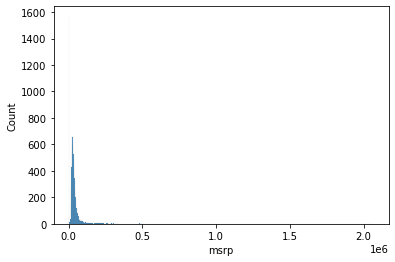

In [110]:
sns.histplot(df.msrp)
plt.show()

We observe that the target variable has a very long tail. The long tail makes it quite difficult for us to see the distribution, but it has an even stronger effect on a model: such distribution can greatly confuse the model, so it won’t learn well enough. Let us cut part of this tail to get a better visualization.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

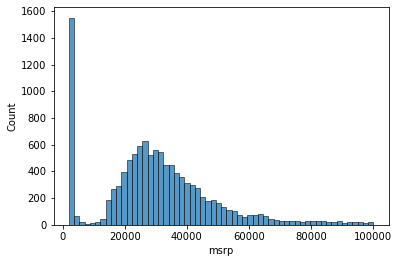

In [7]:
sns.histplot(x="msrp",data=df[df["msrp"]<100000])

To get a shorter set of values and then the algortihms works better, we apply logarithm to msrp and add the values to a new column.

In [167]:
df['log_msrp']=np.log1p(df.msrp)

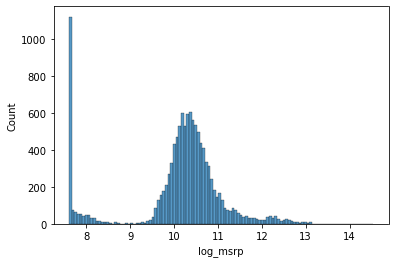

In [112]:
sns.histplot(df.log_msrp)
plt.show()

By looking again at the info, we perform simple feature engineering by creating a new column called 'age' with the number of years of the car.  
Moreover, notice that number of doors is a categorical variable. In order to have few dtypes, let us convert it to object type.  

In [172]:
df['age']=df.year.max()-df.year
df['number_of_doors']=df['number_of_doors'].astype('object')

Now, we inspect the missing values of the dataframe

In [173]:
print(df.isnull().sum())

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
log_msrp                0
age                     0
dtype: int64


In [174]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  object 
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
 16  log_msrp           119

We observe that the market_category has a large number of missing values. Afortunately, our target variable, log_msrp, does not have missing values. Later, we'll fill the numerical missing values with the SimpleImpute module of sklearn. Before, let us visualize our numerical data in histograms.

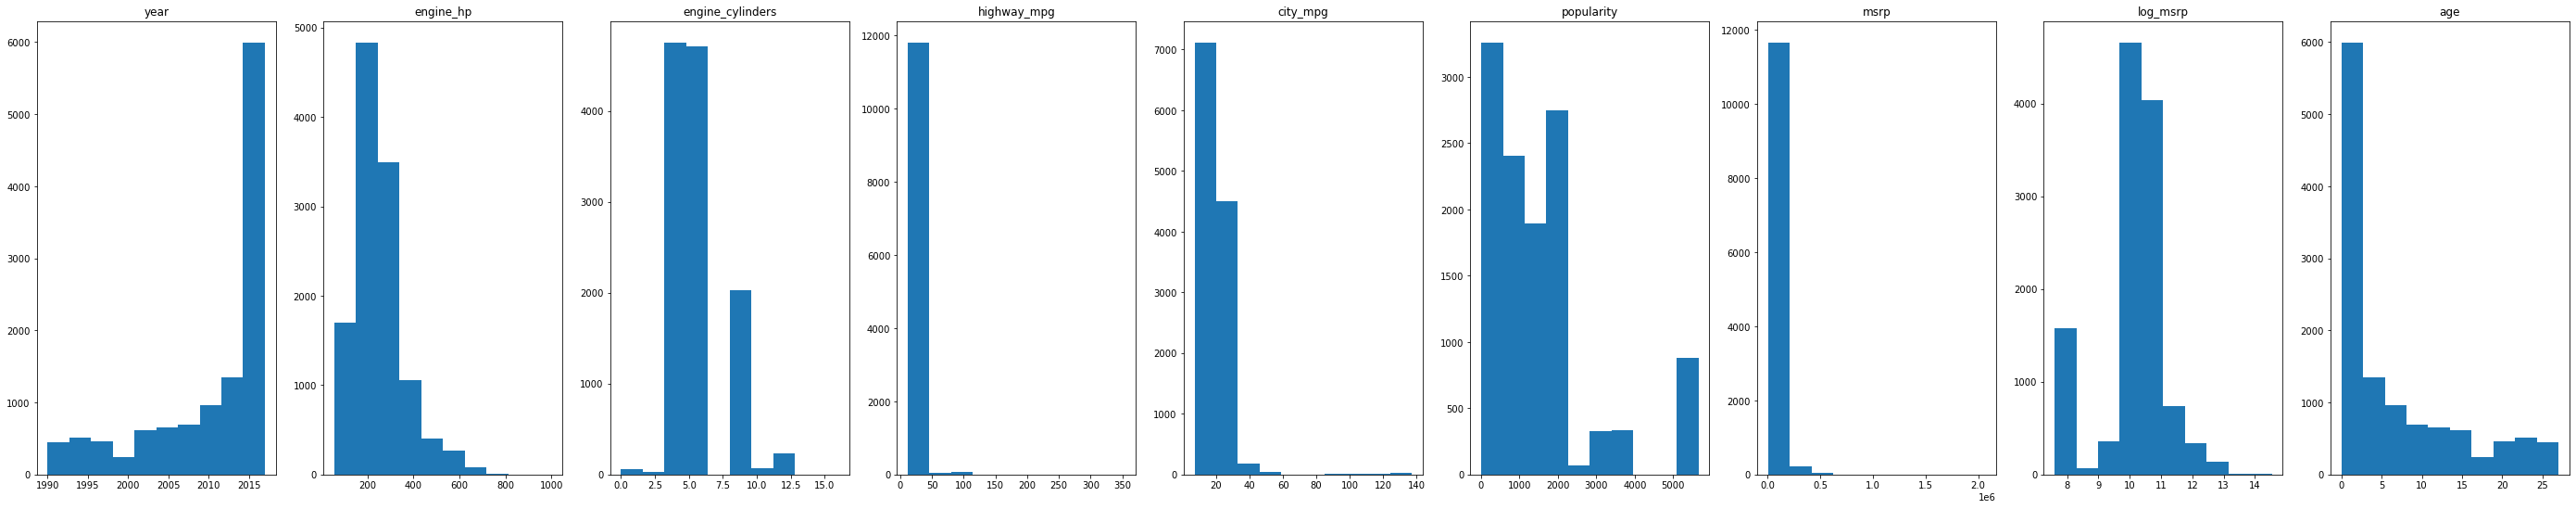

In [175]:
df_num=df.select_dtypes(include=['float64','int64'])
fig, axs = plt.subplots(ncols=len(df_num.columns), figsize=(49, 9))
for i, col in enumerate(df_num.columns):
    axs[i].hist(df_num[col])
    axs[i].set_title(col)
plt.show()

Owing to the different domains of our numerical data, we observe that we need to standardize it. Moreover, we need to deal with the missing values.  
   
Note also that for the further models we will not consider the year column.   
  
As first categorical feature to consider for modelling, we use transmission_type.   

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  object 
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(2), int64(5

In [51]:
#for col in list(df.dtypes[df.dtypes=='int64'].index):
#    df[col]=df[col].astype(float)

We define the dataframes of the target and feature elements. We start with the numerical features and the object feature transmission_type, and form the matrix X from them. In the previous example, we used only three features. This time, we include a couple more features and use the following columns:  
* engine_hp  
* engine_cylinders  
* highway_mpg  
* city_mpg   
* popularity  
* transmission_type  
  
Recall that our target variable is log_msrp  

In [176]:
y=df.log_msrp
X=pd.concat([df.drop(['log_msrp','msrp','year'],axis=1).select_dtypes(include=['float64','int64']),df['transmission_type']],axis=1)
print(X)

       engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity  age  \
0          335.0               6.0           26        19        3916    6   
1          300.0               6.0           28        19        3916    6   
2          300.0               6.0           28        20        3916    6   
3          230.0               6.0           28        18        3916    6   
4          230.0               6.0           28        18        3916    6   
...          ...               ...          ...       ...         ...  ...   
11909      300.0               6.0           23        16         204    5   
11910      300.0               6.0           23        16         204    5   
11911      300.0               6.0           23        16         204    5   
11912      300.0               6.0           23        16         204    4   
11913      221.0               6.0           26        17          61   11   

      transmission_type  
0                manual  
1          

### Machine learning models - fitting Linear Regression with sklearn and using Regularization   
Let's start our machine learning preprocessing. We have identified or numerical and categorical data; we construct a preprocessor handling numerical data with standarize and imputing, and categorical data with OneHotEncoder and imputing. The problem we are solving is a regression problem: the goal is to predict a number — the price of a car. For this project we will use the simplest regression model, linear regression, as well its Lasso and Ridge regularizations.

In [177]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge


In [178]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_hp          11845 non-null  float64
 1   engine_cylinders   11884 non-null  float64
 2   highway_mpg        11914 non-null  int64  
 3   city_mpg           11914 non-null  int64  
 4   popularity         11914 non-null  int64  
 5   age                11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 651.7+ KB


In [179]:
#Lists of the numeric and categorical features
numeric_features=X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features=X.select_dtypes(include=['object']).columns.tolist()

#Pipeline for preprocessing the numeric data, the strategy of the imputer will be the median
numeric_transformer=Pipeline(steps=[('imp_num',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

#Pipeline for processing the categorical data, the strategy of the imputer will be the most_frequent
categorical_transformer=Pipeline(steps=[('imp_cat',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown = 'ignore'))])

#Preprocessor for dealing the numeric and categorical features
preprocessor=ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

Let us remark that to evaluate our model we use the metric root mean squared error- RMSE for short.  
$$RMSE=\sqrt{\frac{1}{m}\sum_{i=1}^{m}(g(x_{i})-y_{i})^{2}}$$

The RMSE performance of LinearRegression is 0.5081832568210097


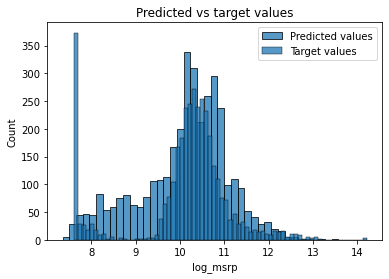

The RMSE performance of Lasso is 0.5390216549864832


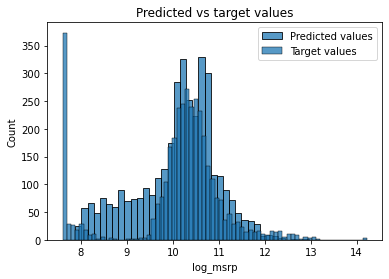

The RMSE performance of Ridge is 0.5081844301679662


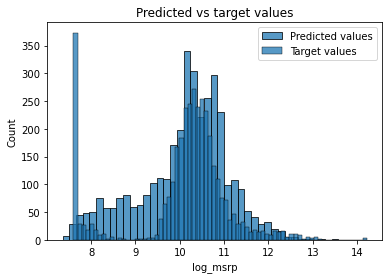

In [180]:
from sklearn.metrics import mean_squared_error
#Now construct the pipelines for Linear Regression, Ridge, and Lasso  
pipe_linear=Pipeline(steps=[('preprocess',preprocessor),('model',LinearRegression())])
pipe_lasso=Pipeline(steps=[('preprocess',preprocessor),('model',Lasso(alpha=0.1))])
pipe_ridge=Pipeline(steps=[('preprocessor',preprocessor),('model',Ridge(alpha=0.1))])

#We create of list with the previous pipelines
pipelines=[pipe_linear,pipe_lasso,pipe_ridge]

#And fit, predict, and evaluate
for pipeline in pipelines:
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    mse=mean_squared_error(y_pred,y_test,squared=False)
    name=pipeline.named_steps['model'].__class__.__name__
    print("The RMSE performance of {} is {}".format(name,mse))
    sns.histplot(y_pred,label="Predicted values")
    sns.histplot(y_test,label="Target values")
    plt.title("Predicted vs target values")
    plt.legend()
    plt.show()

We observe that Ridge and simple Linear regression present slightly lower values than Lasso.

Let us now consider adding more categorical variables to see if our performance could be better. Recall that the attributes are:  

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
 16  log_msrp           119

In [123]:
#The distinc value counts of vehicle_style:
df.vehicle_style.value_counts()

sedan                  3048
4dr_suv                2488
coupe                  1211
convertible             793
4dr_hatchback           702
crew_cab_pickup         681
extended_cab_pickup     623
wagon                   592
2dr_hatchback           506
passenger_minivan       417
regular_cab_pickup      392
2dr_suv                 138
passenger_van           128
cargo_van                95
cargo_minivan            71
convertible_suv          29
Name: vehicle_style, dtype: int64

In [181]:
#Then we add this category together with number_of_doors to the features 
X=pd.concat([df.drop(['log_msrp','msrp','year'],axis=1).select_dtypes(include=['float64','int64']),df[['transmission_type','number_of_doors','vehicle_style']]],axis=1)
#Recall that y=df.log_msrp
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_hp          11845 non-null  float64
 1   engine_cylinders   11884 non-null  float64
 2   highway_mpg        11914 non-null  int64  
 3   city_mpg           11914 non-null  int64  
 4   popularity         11914 non-null  int64  
 5   age                11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
 7   number_of_doors    11908 non-null  object 
 8   vehicle_style      11914 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 837.8+ KB


Now, to automatize our process, we are going to define a function that takes as input the features X, the target y, and the paramether $\alpha$ (for the Ridge and Lasso regularizations)

In [196]:
def linear_models_ev(X,y,alpha):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler, OneHotEncoder
    from sklearn.pipeline import Pipeline
    from sklearn.impute import SimpleImputer
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression, Lasso, Ridge

    
    #Lists of the numeric and categorical features
    numeric_features=X.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_features=X.select_dtypes(include=['object']).columns.tolist()

#Pipeline for preprocessing the numeric data by imputing and scaling. The strategy for the imputer will be the median
    numeric_transformer=Pipeline(steps=[('imp_num',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

#Pipeline for processing the categorical data, the strategy of the imputer will be the most_frequent
    categorical_transformer=Pipeline(steps=[('imp_cat',SimpleImputer(strategy='most_frequent')),('onehot',OneHotEncoder(handle_unknown = 'ignore'))])

#Preprocessor for dealing the numeric and categorical features
    preprocessor=ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),('cat', categorical_transformer, categorical_features)])

#Split the data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

    from sklearn.metrics import mean_squared_error
#Now construct the pipelines for Linear Regression, Ridge, and Lasso  
    pipe_linear=Pipeline(steps=[('preprocess',preprocessor),('model',LinearRegression())])
    pipe_lasso=Pipeline(steps=[('preprocess',preprocessor),('model',Lasso(alpha=alpha))])
    pipe_ridge=Pipeline(steps=[('preprocessor',preprocessor),('model',Ridge(alpha=alpha))])

#We create of list with the previous pipelines
    pipelines=[pipe_linear,pipe_lasso,pipe_ridge]

#And fit, predict, and evaluate
    for pipeline in pipelines:
        pipeline.fit(X_train,y_train)
        y_pred=pipeline.predict(X_test)
        mse=mean_squared_error(y_pred,y_test,squared=False)
        name=pipeline.named_steps['model'].__class__.__name__
        print("The RMSE performance of {} with alpha={} takes the value {}".format(name,alpha,mse))
        sns.histplot(y_pred,label="Predicted values")
        sns.histplot(y_test,label="Target values")
        plt.title("Predicted vs target values with {} model".format(name))
        plt.legend()
        plt.show()
    
    

The RMSE performance of LinearRegression with alpha=0.1 takes the value 0.48511278986223755


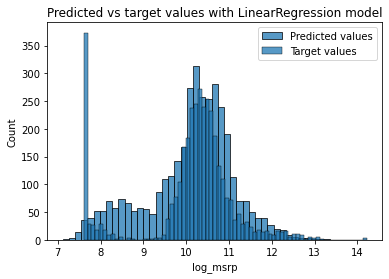

The RMSE performance of Lasso with alpha=0.1 takes the value 0.5390216549864832


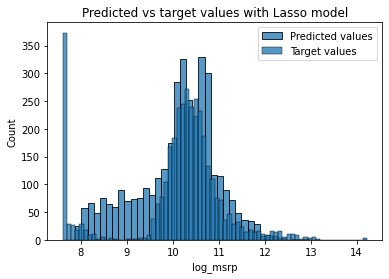

The RMSE performance of Ridge with alpha=0.1 takes the value 0.48512317654265125


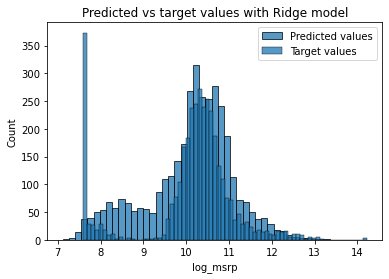

In [183]:
linear_models_ev(X,y,0.1)

We observe that we get a slightly improvement for the Ridge and Linear Regression models.    
Let's add more categorical values

In [128]:
df.driven_wheels.value_counts()

front_wheel_drive    4787
rear_wheel_drive     3371
all_wheel_drive      2353
four_wheel_drive     1403
Name: driven_wheels, dtype: int64

In [185]:
#We add driven wheels 
X=pd.concat([df.drop(['log_msrp','msrp','year'],axis=1).select_dtypes(include=['float64','int64']),df[['transmission_type','number_of_doors','driven_wheels','vehicle_style']]],axis=1)
#Recall that y=df.log_msrp
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_hp          11845 non-null  float64
 1   engine_cylinders   11884 non-null  float64
 2   highway_mpg        11914 non-null  int64  
 3   city_mpg           11914 non-null  int64  
 4   popularity         11914 non-null  int64  
 5   age                11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
 7   number_of_doors    11908 non-null  object 
 8   driven_wheels      11914 non-null  object 
 9   vehicle_style      11914 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


The RMSE performance of LinearRegression with alpha=0.1 takes the value 0.4842116706951099


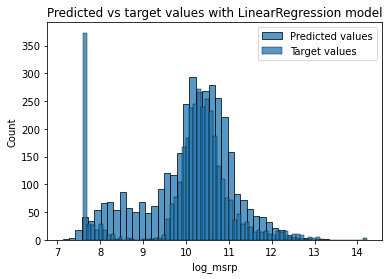

The RMSE performance of Lasso with alpha=0.1 takes the value 0.5390216549864788


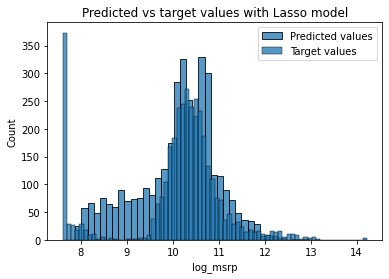

The RMSE performance of Ridge with alpha=0.1 takes the value 0.4846292999519131


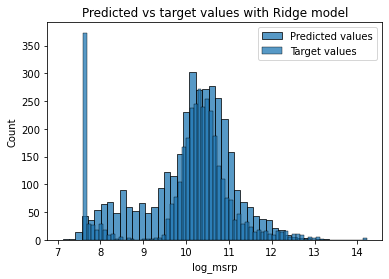

In [186]:
linear_models_ev(X,y,0.1)

In [187]:
df.make.value_counts()

chevrolet        1123
ford              881
volkswagen        809
toyota            746
dodge             626
nissan            558
gmc               515
honda             449
mazda             423
cadillac          397
mercedes_benz     353
suzuki            351
bmw               334
infiniti          330
audi              328
hyundai           303
volvo             281
subaru            256
acura             252
kia               231
mitsubishi        213
lexus             202
buick             196
chrysler          187
pontiac           186
lincoln           164
oldsmobile        150
land_rover        143
porsche           136
saab              111
aston_martin       93
plymouth           82
bentley            74
ferrari            69
fiat               62
scion              60
maserati           58
lamborghini        52
rolls_royce        31
lotus              29
tesla              18
hummer             17
maybach            16
alfa_romeo          5
mclaren             5
spyker    

In [188]:
#We add make
X=pd.concat([df.drop(['log_msrp','msrp','year'],axis=1).select_dtypes(include=['float64','int64']),df[['transmission_type','number_of_doors','make','driven_wheels','vehicle_style']]],axis=1)
#Recall that y=df.log_msrp
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_hp          11845 non-null  float64
 1   engine_cylinders   11884 non-null  float64
 2   highway_mpg        11914 non-null  int64  
 3   city_mpg           11914 non-null  int64  
 4   popularity         11914 non-null  int64  
 5   age                11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
 7   number_of_doors    11908 non-null  object 
 8   make               11914 non-null  object 
 9   driven_wheels      11914 non-null  object 
 10  vehicle_style      11914 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1024.0+ KB


The RMSE performance of LinearRegression with alpha=0.1 takes the value 0.4361342993607835


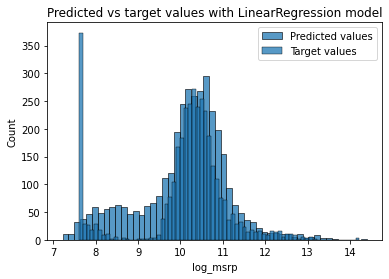

The RMSE performance of Lasso with alpha=0.1 takes the value 0.5390216549864788


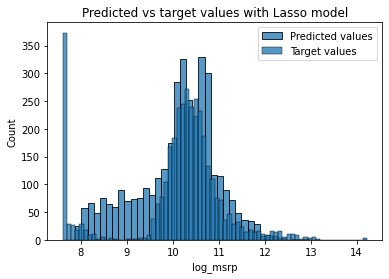

The RMSE performance of Ridge with alpha=0.1 takes the value 0.4369814828203602


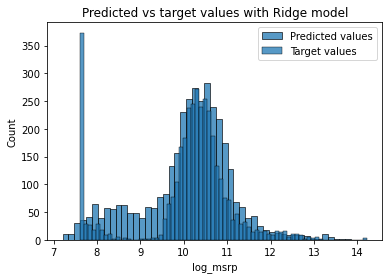

In [189]:
linear_models_ev(X,y,0.1)

Therefore, by adding  the feature make, we got a better improvement.    

In [141]:
df.vehicle_size.value_counts()

compact    4764
midsize    4373
large      2777
Name: vehicle_size, dtype: int64

In [190]:
#We add vehicle_size
X=pd.concat([df.drop(['log_msrp','msrp','year'],axis=1).select_dtypes(include=['float64','int64']),df[['transmission_type','number_of_doors','vehicle_size','make','driven_wheels','vehicle_style']]],axis=1)
#Recall that y=df.log_msrp
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_hp          11845 non-null  float64
 1   engine_cylinders   11884 non-null  float64
 2   highway_mpg        11914 non-null  int64  
 3   city_mpg           11914 non-null  int64  
 4   popularity         11914 non-null  int64  
 5   age                11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
 7   number_of_doors    11908 non-null  object 
 8   vehicle_size       11914 non-null  object 
 9   make               11914 non-null  object 
 10  driven_wheels      11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 1.1+ MB


The RMSE performance of LinearRegression with alpha=0.1 takes the value 0.43522888184851527


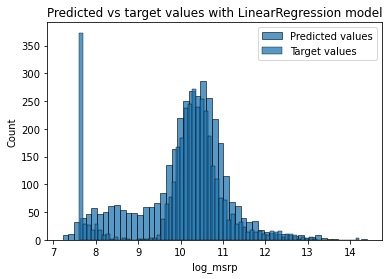

The RMSE performance of Lasso with alpha=0.1 takes the value 0.5390216549864788


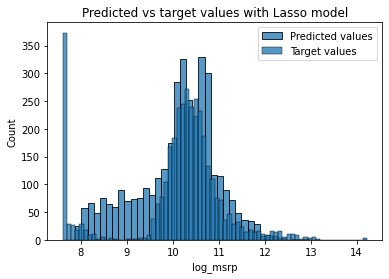

The RMSE performance of Ridge with alpha=0.1 takes the value 0.4359399030220846


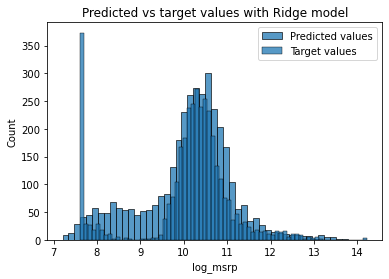

In [191]:
linear_models_ev(X,y,0.1)

In [193]:
df.market_category.value_counts()

crossover                                          1110
flex_fuel                                           872
luxury                                              855
luxury_performance                                  673
hatchback                                           641
                                                   ... 
crossover_exotic_luxury_performance                   1
exotic_luxury_high_performance_hybrid                 1
crossover_exotic_luxury_high_performance              1
flex_fuel_factory_tuner_luxury_high_performance       1
performance_hybrid                                    1
Name: market_category, Length: 71, dtype: int64

Finally, we add the features model and market_category.

In [198]:
#We add market_category
X=pd.concat([df.drop(['log_msrp','msrp','year'],axis=1).select_dtypes(include=['float64','int64']),df[['transmission_type','model','market_category','number_of_doors','vehicle_size','make','driven_wheels','vehicle_style']]],axis=1)
#Recall that y=df.log_msrp
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   engine_hp          11845 non-null  float64
 1   engine_cylinders   11884 non-null  float64
 2   highway_mpg        11914 non-null  int64  
 3   city_mpg           11914 non-null  int64  
 4   popularity         11914 non-null  int64  
 5   age                11914 non-null  int64  
 6   transmission_type  11914 non-null  object 
 7   model              11914 non-null  object 
 8   market_category    8172 non-null   object 
 9   number_of_doors    11908 non-null  object 
 10  vehicle_size       11914 non-null  object 
 11  make               11914 non-null  object 
 12  driven_wheels      11914 non-null  object 
 13  vehicle_style      11914 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 1.3+ MB


The RMSE performance of LinearRegression with alpha=0.1 takes the value 0.2050950766182755


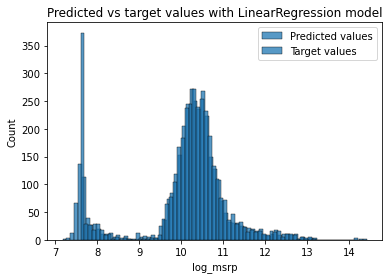

The RMSE performance of Lasso with alpha=0.1 takes the value 0.5390216549864788


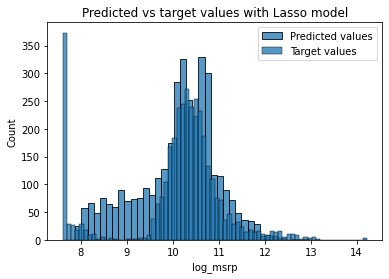

The RMSE performance of Ridge with alpha=0.1 takes the value 0.2106984283437415


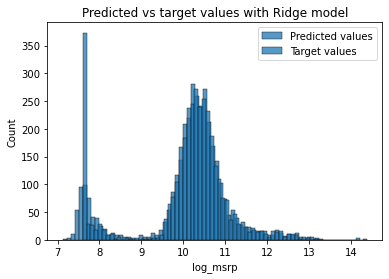

In [199]:
linear_models_ev(X,y,0.1)

We observe that we obtained and incredible improvement of our fit, these last two categories are the most relevant.

## Conclusions:

We followed a detailed machine learning process. We imported and cleaned our data in detail before the machine-learning preprocessing. We constructed a scalable function-model that takes as input a dataframe with both numeric and object features, a target variable, and a parameter $\alpha$ that evaluates the Linear Regression, Lasso and Ridge models. At the beginning, this function performs a rigorous preprocessing by standarizing, imputing and encoding both numerical and object features. Then it evaluates the models mentioned. This function can also be manipulated to perform a GridSearch for looking the best $\alpha$ parameter.  
We evaluate the performance of our model by adding more categorical variables. We observed that by adding more object features it performs better.  